## Supplementary - order of phase corrections ##

Examine the right order of different phase corrections in time-series: tropo, DEM error and/or ramp. The simulated time-series includes:

1. simulated displacement time-series
2. stratified tropospheric delay from MERRA
3. stochatic tropospheric turbulence based on power-law characteristics with power factor estimated from real time-series phase residual
5. topographic residual phase from DEM error estimated in real data
6. plane phase ramp estimated from real data

Check details of 3D raw phase time-series simulation: [notebook](https://github.com/insarlab/MintPy/tree/master/docs/examples/simulations)

In [1]:
%matplotlib inline
import os
from mintpy import view

work_dir = os.path.expanduser('~/Documents/Paper/2019_MintPy/Notebooks/phaseCorrection_order')
if not os.path.isdir(work_dir):
    os.makedirs(work_dir)
os.chdir(work_dir)
print('Go to directory: '+work_dir)

out_dir = os.path.join(work_dir, 'pic')
if not os.path.isdir(out_dir):
    os.makedirs(out_dir)
    print('create directory: '+out_dir)

proj_dir = os.path.expanduser('~/insarlab/Galapagos/AlcedoSenDT128/mintpy')
ecmwf_file = os.path.join(proj_dir, 'inputs/ECMWF.h5')
water_mask_file = os.path.join(proj_dir, 'waterMask.h5')

Go to directory: /Users/yunjunz/Documents/Paper/2019_MintPy/Notebooks/phaseCorrection_order


In [2]:
## Truth velocity
!timeseries2velocity.py sim_displacement.h5 -o velocity_sim.h5

open timeseries file: sim_displacement.h5
--------------------------------------------------
dates from input file: 98
['20141213', '20141225', '20150307', '20150319', '20150331', '20150412', '20150424', '20150506', '20150518', '20150530', '20150611', '20150623', '20150717', '20150729', '20150822', '20150903', '20150915', '20150927', '20151009', '20151021', '20151102', '20151114', '20151126', '20151208', '20151220', '20160101', '20160113', '20160125', '20160206', '20160218', '20160301', '20160406', '20160418', '20160430', '20160512', '20160524', '20160605', '20160629', '20160711', '20160723', '20160804', '20160816', '20160828', '20160909', '20160921', '20161003', '20161015', '20161027', '20161108', '20161120', '20161202', '20161214', '20161226', '20170107', '20170119', '20170131', '20170212', '20170224', '20170308', '20170320', '20170401', '20170413', '20170425', '20170507', '20170519', '20170531', '20170612', '20170624', '20170706', '20170718', '20170730', '20170811', '20170823', '201

In [3]:
## Phase correction used in MintPy: tropo -> topoResid -> deramp

cmd = 'diff.py timeseries.h5 {} -o timeseries_ECMWF.h5'.format(ecmwf_file)
!{cmd}

!dem_error.py timeseries_ECMWF.h5 -o timeseries_ECMWF_demErr.h5

cmd = 'remove_ramp.py timeseries_ECMWF_demErr.h5 -m {}'.format(water_mask_file)
!{cmd}

!timeseries2velocity.py timeseries_ECMWF_demErr_ramp.h5 -o velocity_mintpy.h5

timeseries.h5 - ['/Users/yunjunz/insarlab/Galapagos/AlcedoSenDT128/mintpy/inputs/ECMWF.h5'] --> timeseries_ECMWF.h5
input files are: timeseries and timeseries
open timeseries file: timeseries.h5
open timeseries file: ECMWF.h5
reading timeseries data from file: timeseries.h5 ...
create timeseries HDF5 file: timeseries_ECMWF.h5 with w mode
create dataset /timeseries of float32    in size of (98, 646, 729) with compression=lzf
create dataset /dates      of |S8        in size of (98,)
create dataset /bperp      of float32    in size of (98,)
finished writing to timeseries_ECMWF.h5
read mean incidenceAngle,slantRangeDistance,bperp value from timeseries file
near   incidence angle : 31.7210 degree
far    incidence angle : 34.8531 degree
center incidence angle : 33.2871 degree
center range : 819360.14 m
near   range : 806640.74 m
far    range : 832079.55 m
open timeseries file: timeseries_ECMWF.h5
--------------------------------------------------------------------------------
correct topogra

In [4]:
## Phase correction used in GIANT: tropo -> deramp -> topoResid

cmd = 'diff.py timeseries.h5 {} -o timeseries_ECMWF.h5'.format(ecmwf_file)
!{cmd}

cmd = 'remove_ramp.py timeseries_ECMWF.h5 -m {}'.format(water_mask_file)
!{cmd}

!dem_error.py timeseries_ECMWF_ramp.h5

!timeseries2velocity.py timeseries_ECMWF_ramp_demErr.h5 -o velocity_giant.h5

timeseries.h5 - ['/Users/yunjunz/insarlab/Galapagos/AlcedoSenDT128/mintpy/inputs/ECMWF.h5'] --> timeseries_ECMWF.h5
input files are: timeseries and timeseries
open timeseries file: timeseries.h5
open timeseries file: ECMWF.h5
reading timeseries data from file: timeseries.h5 ...
create timeseries HDF5 file: timeseries_ECMWF.h5 with w mode
create dataset /timeseries of float32    in size of (98, 646, 729) with compression=lzf
create dataset /dates      of |S8        in size of (98,)
create dataset /bperp      of float32    in size of (98,)
finished writing to timeseries_ECMWF.h5
remove linear ramp from file: timeseries_ECMWF.h5
read mask file: /Users/yunjunz/insarlab/Galapagos/AlcedoSenDT128/mintpy/waterMask.h5
reading data ...
estimating phase ramp ...
create timeseries HDF5 file: timeseries_ECMWF_ramp.h5 with w mode
create dataset /timeseries of float32    in size of (98, 646, 729) with compression=lzf
create dataset /dates      of |S8        in size of (98,)
create dataset /bperp     

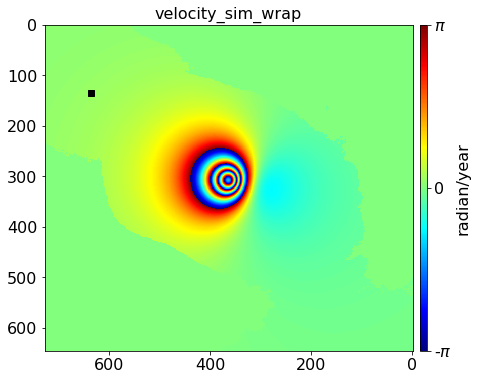

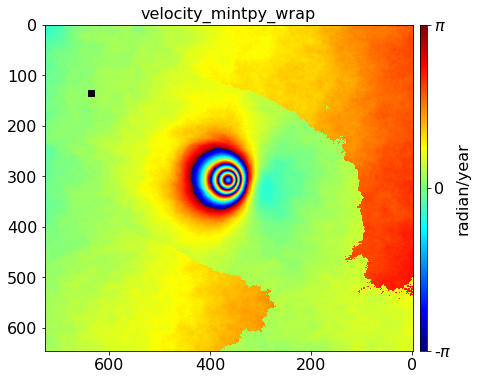

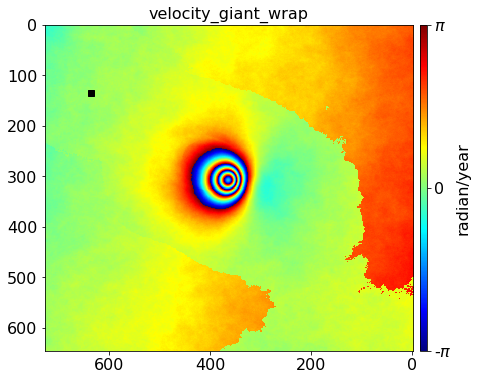

In [5]:
# plot velocity file from different orders
vel_files = ['velocity_sim.h5', 'velocity_mintpy.h5', 'velocity_giant.h5']
for fname in vel_files:
    scp_args = ' {} velocity -m waterMask.h5 --wrap --noverbose '.format(fname)
    view.main(scp_args.split())

timeseries_ECMWF_demErr_ramp.h5 - ['timeseries_ECMWF_ramp_demErr.h5'] --> timeseries_diff.h5
input files are: timeseries and timeseries
open timeseries file: timeseries_ECMWF_demErr_ramp.h5
open timeseries file: timeseries_ECMWF_ramp_demErr.h5
reading timeseries data from file: timeseries_ECMWF_demErr_ramp.h5 ...
create timeseries HDF5 file: timeseries_diff.h5 with w mode
create dataset /timeseries of float32    in size of (98, 646, 729) with compression=lzf
create dataset /dates      of |S8        in size of (98,)
create dataset /bperp      of float32    in size of (98,)
finished writing to timeseries_diff.h5
run view.py in MintPy release version v1.1.2-93, release date 2019-07-23
input file is timeseries file: /Users/yunjunz/Documents/Paper/2019_MintPy/Notebooks/phaseCorrection_order/timeseries_diff.h5 in float32 format
file size in y/x: (646, 729)
num of datasets in file timeseries_diff.h5: 98
datasets to exclude (0):
[]
datasets to display (98):
['timeseries-20141213', 'timeseries-

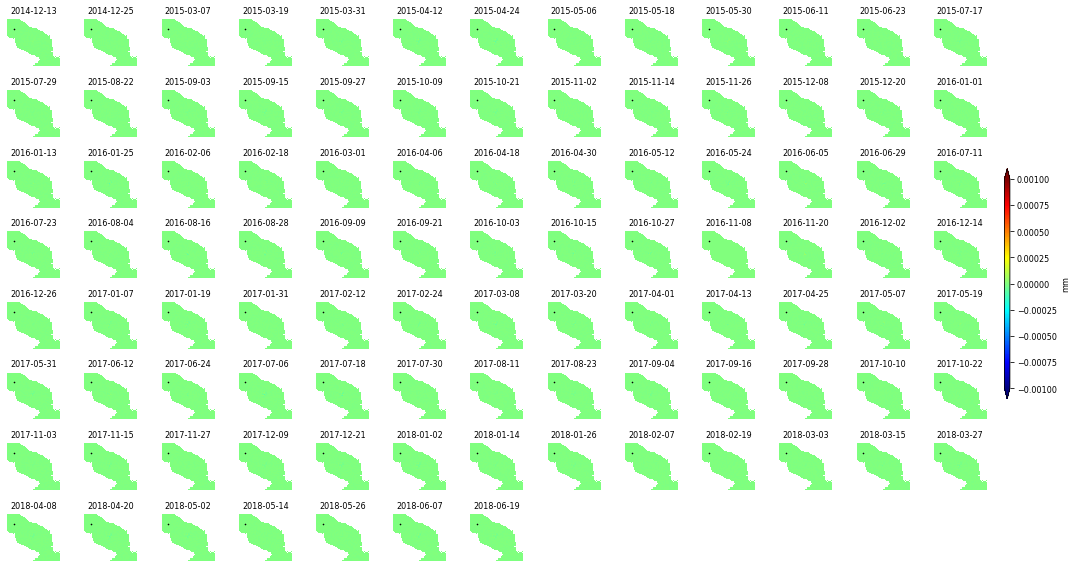

In [6]:
# plot the difference between the estimated displacement timeseries file from different orders
!diff.py timeseries_ECMWF_demErr_ramp.h5 timeseries_ECMWF_ramp_demErr.h5 -o timeseries_diff.h5

scp_args = ' timeseries_diff.h5 -u mm -v -0.001 0.001 -m {} --noaxis '.format(water_mask_file)
view.main(scp_args.split())